In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

2025-05-25 14:36:56.388952: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

2025-05-25 14:37:28.407616: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 43120000 exceeds 10% of free system memory.


In [5]:
def process_img(x, y):
    x = x /255
    return (x, y)

In [6]:
dataset = dataset.map(process_img)

In [7]:
dataset = dataset.batch(32)

2025-05-25 14:37:38.555434: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 43120000 exceeds 10% of free system memory.


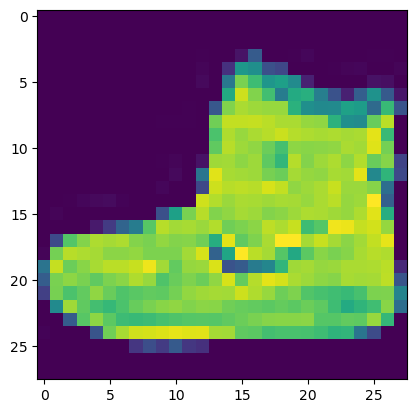

In [8]:
for i in dataset.take(1):
    img = i[0][0]
    plt.imshow(img)
    break

In [9]:
dataset = dataset.shuffle(1000)

# Build the CCN (Neural Network)

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.Input(shape=[28, 28, 1]),

        # CNN block 1
        tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding="SAME", activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        # CNN block 2
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),

        # CNN block 3
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        # CNN block 4
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),

        # CNN block 5
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
        tf.keras.layers.MaxPooling2D(pool_size=2),

        # Dense (Fully Connceted Layers)
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

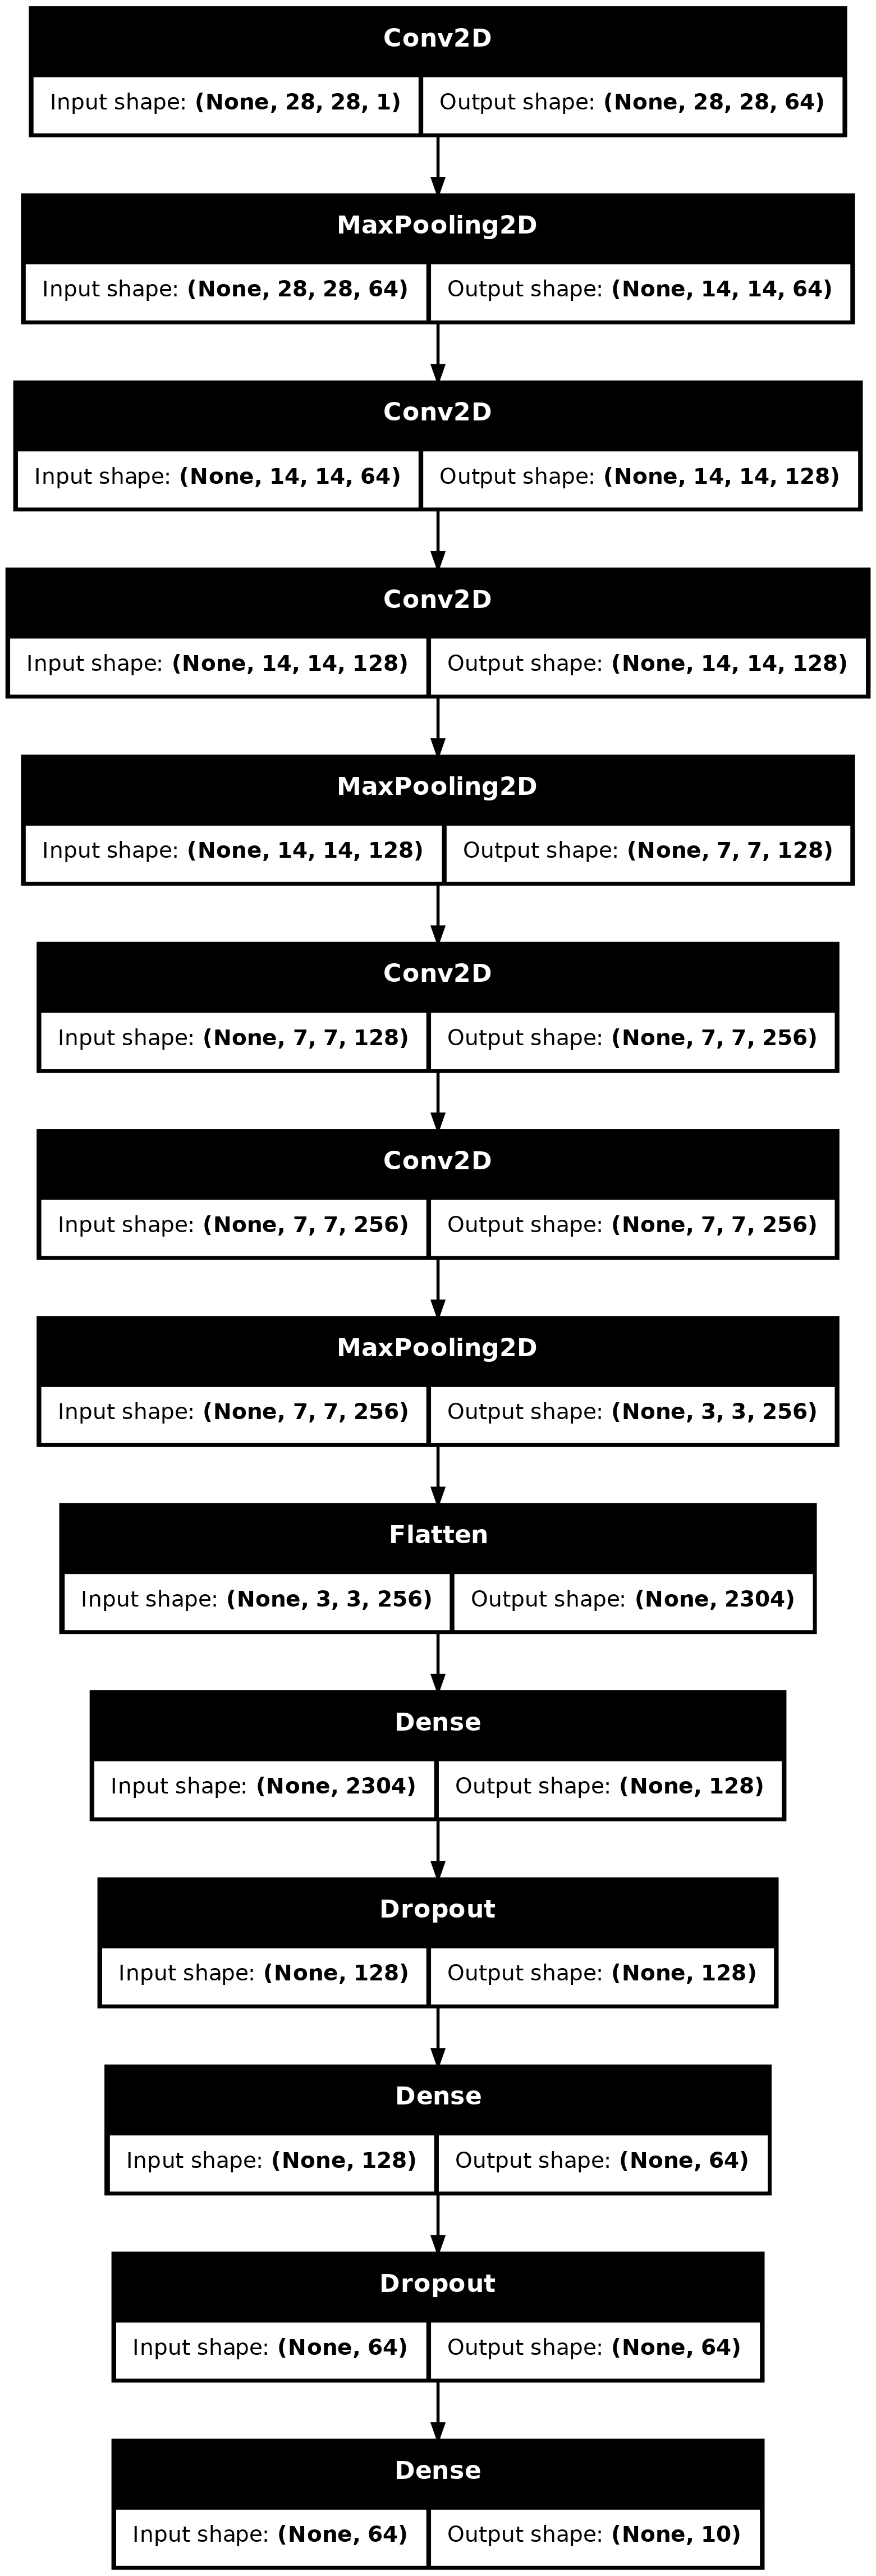

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Compile the model 

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model 

In [17]:
history = model.fit(dataset, 
                    epochs=10, 
                    steps_per_epoch=10, # To be disabled 
                    validation_data=(X_valid, y_valid))

Epoch 1/10


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8375 - loss: 0.4766 - val_accuracy: 0.8392 - val_loss: 31.1222
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8197 - loss: 0.5511 - val_accuracy: 0.8350 - val_loss: 28.3347
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8324 - loss: 0.5312 - val_accuracy: 0.8452 - val_loss: 21.3405
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8043 - loss: 0.5065 - val_accuracy: 0.8072 - val_loss: 43.4769
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8407 - loss: 0.4696 - val_accuracy: 0.8048 - val_loss: 31.1960
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7753 - loss: 0.5419 - val_accuracy: 0.8158 - val_loss: 28.2691
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8166 - loss: 0.5625 - val_accuracy: 0.8168 - val_loss: 34.2700
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8150 - loss: 0.5045 - val_accuracy: 0.8282 - val_loss: 29.

# Plot learning curve 

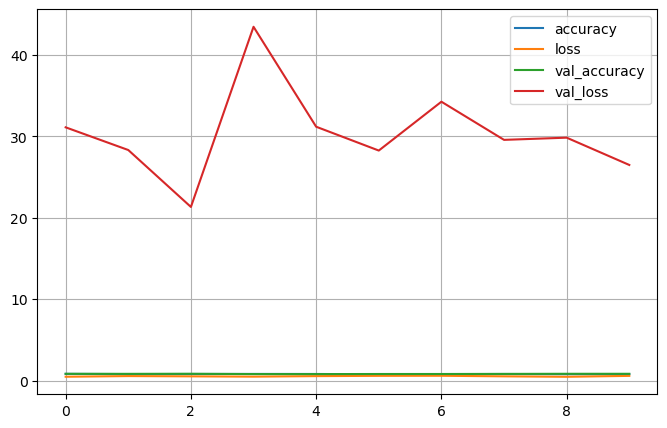

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

# Predicting on the test set

In [26]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(process_img)
test_dataset = test_dataset.batch(32)

In [27]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - accuracy: 0.8449 - loss: 0.4148
Test accuracy: 0.843, Test loss: 0.413


In [36]:
predictions = model.predict(test_dataset)
predictions_argmax = tf.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 90ms/step


In [37]:
predictions[:3].shape, predictions_argmax[:3].shape, y_test[:3].shape

((3, 10), TensorShape([3]), (3,))

In [39]:
predictions_argmax[:3], y_test[:3]

(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([9, 2, 1])>,
 array([9, 2, 1], dtype=uint8))